
# B-spline overview

A *B-spline* curve is a piecewise polynomial function of a specified degree that uses special basis functions (the "B" is for "basis").  B-splines are a generalization of [B&#0233;zier curves](https://en.wikipedia.org/wiki/B%C3%A9zier_curve#Constructing_B%C3%A9zier_curves), which may be familiar from tools that allow one to draw smooth curves based on a few control points ([B&#0233;zier curve example](https://cubic-bezier.com)). 

The locations of boundaries between polynomial pieces are called *knots*, and any sequence of knots must be nondecreasing.  Each knot can be *simple* (unrepeated) or *multiple* (repeated), with those between the first and last knots further characterized as *internal*.  The portion of the domain between two knots is known as a *knot span*.  Knot spans are generally considered closed on the low end and open on the right, i.e., the knot at the lower boundary is included in the span while the one at the upper boundary is not. The number of knots used to define a B-spline curve should be

$$
m = n + p + 1,
$$

where $m+1$ is the number of knots, $n+1$ is the number of control points, and $p$ is the degree of the polynomials that make up the curve (e.g., $p=3$ indicates a B-spline comprising several cubic polynomials over a finite number of knot spans).   

At each knot, two of the polynomials that make up the B-spline meet.  The *multiplicity* $k$ of a knot (the number of times it appears in the knot sequence) is related to the kind of continuity the overall curve will exhibit at the knot. Roughly, the continuity of polynomials for successive knot spans is expressed as $C^{p-k}$, with the power indicating that the $0$th through $p-k$th derivatives of the two polynomials that meet at that knot are equal at the boundary.  Thus $C^0$ continuity means that at the boundary, the values (0th derivatives) of the polynomials on either side are equal; $C^1$ continuity means both values and slopes (1st derivatives) are equal; $C^2$ continuity means values, slopes, and curvatures (2nd derivatives) are all equal, etc.  

For example, for a cubic ($p=3$) B-spline, a simple knot (i.e., $k=1$) indicates that the cubic polynomials on either side of a knot are continuous to the 2nd ($p-k=3-1=2$) derivative at the boundary. In other words, the two polynomials on either side of a simple knot have the same value, slope, and curvature. For the same B-spline, a knot of multiplicity 2 (one that appears exactly twice in the knot sequence) indicates that only the value and slope must be equal at the knot boundary, while the curvature at the boundary can be discontinuous.  Of course, with multiplicity $k=0$, there is no boundary and the polynomials on either "side" of such a value are equal down to the $p$th derivative since both use the same polynomial.  

Knot multiplicity is limited by the *Schoenberg-Whitney conditions*, which ensures that each knot span has sufficient control points to constrain and uniquely define a B-spline curve.  A knot sequence in which the first and last knots have multiplicity $p+1$ is called a *clamped* knot sequence, and indicate that the resulting B-spline curve will be equal to the first and last control points at the beginning and end (respectively) of the curve.  These points will be discussed in detail later. 

A B-spline curve $\mathbf{C}$  of degree $p$ as a function of independent variable $u$ using knot sequence $\{u_0, u_1, ..., u_m\}$ and control points $\mathbf{P}_0, \mathbf{P}_1, ..., \mathbf{P}_n$ is defined as 

$$
\mathbf{C}(u) = \sum_{i=0}^n N_{i,p}(u)\mathbf{P}_i,
$$

where $N_{i,p}(u)$ are the basis functions.[<sup>1</sup>](#fn1)  These are defined recursively as

$$
N_{i,0}(u) = \begin{cases} 
    1 & \text{if } u_i \leq u < u_{i+1} \\
    0 & \text{otherwise}
\end{cases}
$$

$$
N_{i,p \mid p>0}(u) = \frac{u-u_i}{u_{i+p}-u_i}N_{i,p-1}(u) + \frac{u_{i+p+1}-u}{u_{i+p+1}-u_{i+1}}N_{i+1,p-1}(u).
$$

The recursivity makes these functions difficult to understand, but outlining a few of their properties can help make them clearer.  
* **The $p=0$ basis functions are all just step functions that are non-zero on a single knot span**.  
* Recursion means that **$\boldsymbol{N_{i,p}(u)}$ is non-zero only on $\boldsymbol{[u_i, u_{i+p+1})}$**.  Knot multiplicity may result in this being an empty span.  Since each basis function $N_{i,p}(u)$ only applies to a subset of the domain, these functions are sometimes referred to as *local basis functions* (in opposition to the *global basis function* used for a simple polynomial fit across the entire domain).  One may notice that multiple knots could result in a divide by zero error in some coefficients of the recursion formula, but in those cases the corresponding function also disappears (because it is defined on a zero-length knot span) and the entire term is treated as zero.  
* **On any span $\boldsymbol{[u_i, u_{i+1})}$, at most $\boldsymbol{p+1}$ degree $\boldsymbol{p}$ basis functions are non-zero: $\boldsymbol{N_{i-p,p}(u)}$, $\boldsymbol{N_{i-p+1,p}(u)}$, ..., $\boldsymbol{N_{i,p}(u)}$.**  This is a corollary of the previous property.
* **The sum of all degree $p$ basis functions on any single knot span $\boldsymbol{[u_i, u_{i+1})}$ is 1.**  Thus from a geometric perspective, the B-spline curve at any point can be considered a weighted sum of nearby control points.  One may notice that the coefficients of the recursive formula use ratios of the distance from $u$ to one end of the knot span and the entire length of the span over which the corresponding function is non-zero.  For example, examine the first term of the recursive formula for $N_{i,p}(u)$.  The function $N_{i,p-1}$ is non-zero over $[u_i, u_{i+p})$.  The denominator of the coefficient for that function is the length of the span over which it is non-zero, while the numerator is the distance from $u$ to the left end of the span.  Both the coefficient and the function fall between 0 and 1 and thus so does the value of the first term. Similar logic applies for the second term, although in this case the numerator is the distance between u and the right end of the span over which $N_{i+1,p-1}(u)$ is non-zero. 

Another detail about B-splines is that, being polynomials, their derivatives are fairly simple to compute.  Since the control points are not dependent on $u$, the derivative of a B-spline curve is 

$$
\mathbf{C}'(u) = \sum_{i=0}^n N_{i,p}^{'}(u)\mathbf{P}_i,
$$

where 

$$
N_{i,p}^{'}(u) = \frac{p}{u_{i+p}-u_i}N_{i,p-1}(u) - \frac{p}{u_{i+p+1}-u_{i+1}}N_{i+1,p-1}(u).
$$

Given that any knot span $[u_a, u_{a+1})$ has a limited set of basis functions, the derivative of B-spline curve on that span is

$$
\mathbf{C}'(u \mid u_a \leq u < u_{a+1}) = \sum_{i=a-p+2}^{a} \left(\frac{p}{u_{i+p}-u_i}\right)N_{i,p-1}(u)\left(\mathbf{P}_i - \mathbf{P}_{i-1}\right).
$$


For a B-spline curve with a clamped knot sequence, the derivative of $\mathbf{C}(u)$ can also be expressed as

$$
\begin{align}
\frac{\text{d}}{\text{d}u}\mathbf{C}(u) &= \mathbf{C'}(u) = \sum_{i=0}^{n-1}N_{i+1,p-1}(u)\mathbf{Q}_i, \\
\text{where} \qquad \mathbf{Q}_i &= \frac{p}{u_{i+p+1}-u_{i+1}} \left(\mathbf{P}_{i+1}-\mathbf{P}_i\right).
\end{align}
$$

*It will be useful to have the formulas for the basis functions, as well as for $\mathbf{C}(u)$ and its derivative, written down for reference while reading through the following discussion.  The properties describing the relationship between knot spans and non-zero basis functions will also come in handy.*

---
<span id="fn1">1. Note that the $\mathbf{C}$ representing the B-spline curve is a different symbol than the $C$ used in expressions of continuity.</span>

# Fitting a non-geometric data set

Given a data set of $(x,y)$ points ordered so that $x$ is nondecreasing, fitting the data with a B-spline curve function such that $\mathbf{C}(x_i) = y_i$ may be fairly easy using high-level tools such as those available in MATLAB's [Curve Fitting Toolbox](https://www.mathworks.com/help/curvefit/splines.html) or Python's [SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html#spline-interpolation) library.  At a basic level, internally these functions typically solve linear algebra problem 

$$
\mathbf{Am}=\mathbf{d},
$$

where $\mathbf{d}$ is a column vector of the $y$ values of the data set and $\mathbf{A}$ is a matrix (called the *collocation matrix*) where $\mathbf{A}_{r,c} = N_{c,p}(x_r)$.  Here one solves the equation for $\mathbf{m}$, a vector of coefficients that correspond to the $\mathbf{P}_i$ control points in the B-spline curve function $\mathbf{C}(u)$.  Thus in the curve-fitting context, one can consider a B-spline curve to be defined as

$$
\mathbf{C}(u) = \sum_{i=0}^n \alpha_{i} N_{i,p}(u),
$$

where each $\alpha_i$ is a coefficient for a corresponding basis function.

Solving for $\mathbf{m}$ may seem counterintuitive given the geometric motivation in the previous section, which might lead one to expect the data to correspond to the B-spline's control points.  However, the data points are points on the B-spline curve and the solution being sought is a set of control points that could be used to build that curve.  In other words, this is an inverse problem: rather than solving a known function to get the value $y$ at some $x$, in an inverse problem the input ($x$) and output ($y$) are known and one has to figure out the function.  More explicitly, each row in matrix operator $\mathbf{A}$ represents a data point, while each column represents a coefficient (or control point from the geometric perspective).  Of course, it is unlikely that an exact solution to the problem exists and the calculated coefficients therefore typically represent a least-squares fit.

Note the dependence on the knot sequence, which dictates the number of coefficients and basis functions according to formula $m=n+p+1$ presented earlier.  A happy consequence of solving for the coefficients is that one need not exactly calibrate the number of knots to meet the dictates of that formula.  One is however motivated to minimize the number of knots needed to reproduce the curve, as fewer knots means fewer computations.  Note that knot selection can lead to issues related to the Schoenberg-Whitney conditions when fitting a very small data set, as will be shown later. 

The simplest tools fitting a B-spline curve to a data set will accept a set of $(x,y)$ points and return an object or data structure containing the three pieces of information required to calculate $\mathbf{C}(u)$ for any other set of values: 
* the knot sequence $\{u_0, u_1, ..., u_m\}$, 
* the degree $p$ (often defaulting to $p=3$), and 
* the coefficient vector $\mathbf{m}$ (can also be thought of as the control points $P_i$).  

With this information, expected values can be calculated for any new set of data: the knot sequence and degree can be combined with a new set of $x$ values to create collocation matrix $\mathbf{A}$, which is then multiplied by the coefficient vector $\mathbf{m}$ to determine interpolated values of the B-spline.  In many cases, these simple routines work well for interpolation.  As an example, consider the following partial data set, which shows the relationship between unit volume ($v$) and the [Gr&#0252;neisen parameter](https://en.wikipedia.org/wiki/Gr%C3%BCneisen_parameter) ($\gamma$) at high to near-ambient pressures. Here, an interpolating cubic B-spline using `scipy.interpolate.splrep` is fit to the data. For comparison, both a quadratic B-spline and a simple cubic polynomial fit for this data set are also shown.  Note that the `splrep` parameter `k` refers to the degree $p$, and not to multiplicity as in the discussion above.

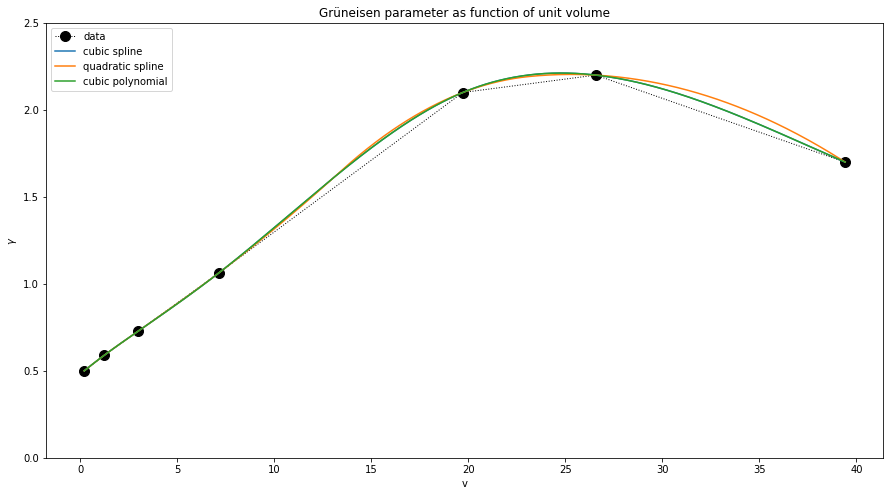

In [3]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

dat_hp = np.array([        # each tuple is V, gamma        
    (1.970940000000000E-01,   5.000000000000000E-01),
    (1.231926085803127E+00,   5.898830058497075E-01),
    (2.954198293491804E+00,   7.261991900404980E-01),
    (7.125924307671044E+00,   1.061940902954853E+00),
    (1.970940000000000E+01,   2.100000000000000E+00),
    (2.656260000000000E+01,   2.200000000000000E+00),
    (3.941890000000000E+01,   1.700000000000000E+00)
], dtype=np.float)

v = dat_hp[:,0]
g = dat_hp[:,1]

def plot_data():
    ax = plt.plot(v, g, 'ko:', linewidth=1, markersize=10, label='data')
    plt.xlabel('v')
    plt.ylabel('$\gamma$')
    plt.ylim((0, 2.5))
    return ax

plot_data();
plt.title('Gr\u00fcneisen parameter as function of unit volume')

v_eval = np.linspace(v[0],v[-1],1000)

# cubic B-spline fit 
spl3 = interp.splrep(v,g) # defaults to k=3
plt.plot(v_eval, interp.splev(v_eval, spl3), label='cubic spline')
# quadratic B-spline fit
spl2 = interp.splrep(v,g,k=2)
plt.plot(v_eval, interp.splev(v_eval, spl2), label='quadratic spline')
# global polynomial fit
f3 = interp.interp1d(v,g,kind=3)
plt.plot(v_eval, f3(v_eval), label='cubic polynomial')

plt.legend(loc='upper left');


Here, the cubic spline and the cubic global polynomial are virtually indistinguishable.  The quadratic spline also gives an equally good interpolating fit.  One of the advantages of a B-spline fit is that a lower degree can work as well or better than a higher one, as will be seen below.

The function `splrep` automatically selected knots, but other functions in the toolkit allow the user to specify their own knot sequences.  Below, the knot sequences for both the cubic and quadratic B-splines are shown.  The first and last knots of each spline correspond to the locations of the first and last points in the data set, and that they both have multiplicity $p+1$.  This will be discussed in detail later.

In [4]:
print('Cubic spline knots:\n{0}'.format(spl3[0]))
print('Quadratic spline knots:\n{0}'.format(spl2[0]))

Cubic spline knots:
[ 0.197094    0.197094    0.197094    0.197094    2.95419829  7.12592431
 19.7094     39.4189     39.4189     39.4189     39.4189    ]
Quadratic spline knots:
[ 0.197094    0.197094    0.197094    2.09306219  5.0400613  13.41766215
 23.136      39.4189     39.4189     39.4189    ]


The `splrep` function also allows the user to specify a knot sequence, but for internal knots only -- the beginning and ending knots are always clamped to the first and last data points, respectively.  Below we compare the default knot sequence for the quadratic spline with custom knot sequences that use fewer knots.  In this example, the internal knots are evenly spaced over the domain without regard to the number of data points actually in each knot span.  In practice this method of knot selection would be fairly rare (especially across the entire domain).  Good knot selection is somewhat of an art and for now this discussion is glossing over that aspect of crafting a B-spline fit.  

In the plots below, locations of knots for each spline are shown by vertical lines in the same color. 

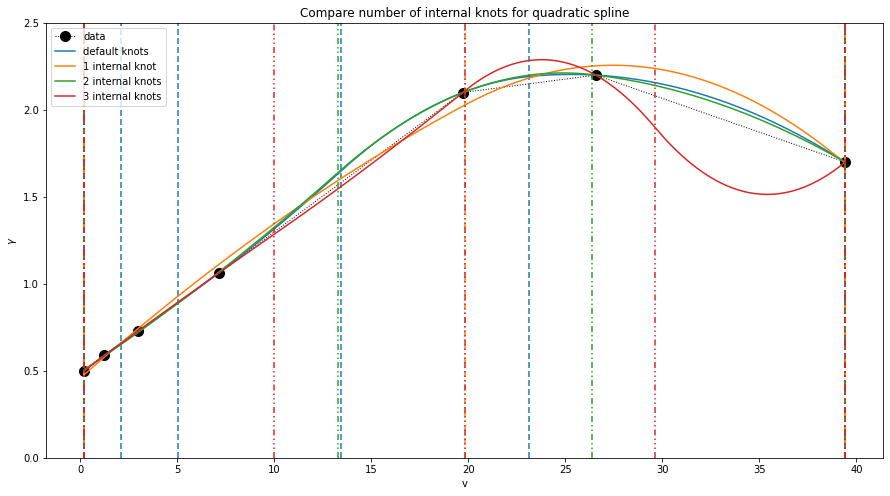

In [5]:
get_internal_knots = lambda numknots: np.linspace(v[0], v[-1], numknots+1, endpoint=False)[1:]
plot_knot_locations = lambda knts, c, ls: [plt.axvline(knt, color=c, linestyle=ls) for knt in knts];
get_linestyle = lambda nik: (0, (4,2)+(1,2)*nik) # ref https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html

def compare_internal_knots(p):
    defspl = interp.splrep(v, g, k=p)
    ldefk = plt.plot(v_eval, interp.splev(v_eval, defspl), label='default knots');
    plot_knot_locations(defspl[0], ldefk[0].get_color(), get_linestyle(0))
    for nik in range(1,4):
        spl = interp.splrep(v, g, k=p, t=get_internal_knots(nik))
        l = plt.plot(v_eval, interp.splev(v_eval, spl), label='{0} internal knot{1}'.format(str(nik), 's' if nik>1 else ''))
        plot_knot_locations(spl[0], l[0].get_color(), get_linestyle(nik)) 
    plt.legend(loc='upper left');
    
plot_data();
plt.title('Compare number of internal knots for quadratic spline')
compare_internal_knots(2)


With three internal knots, the lack of constraints in the last two knot spans results in an unusable fit, as the lack of constraints allowed for unnecessary variability between the data points.  Compare this with the results using a cubic spline, which shows even more extreme wiggle due to the higher polynomial degree.  Uncomment the final line and run the cell again to see the full range of the plot.

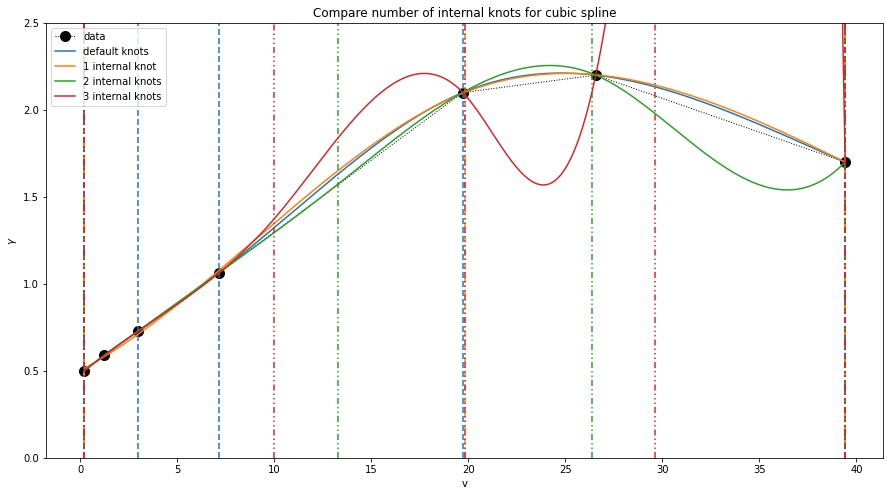

In [6]:
plot_data();
plt.title('Compare number of internal knots for cubic spline')
compare_internal_knots(3)

# plt.ylim((0,13.5))


The fits so far have all been interpolating fits that emphasize the resulting curve passing through the data points.  Note that with two or three internal knots, this is very successful.  The quadratic spline with only one internal knot has only two non-empty knot spans and is unable to exactly fit data points while maintaining the required continuity at its sole internal knot.  However, with three internal knots the final two knot spans have few constraints and the resulting B-spline exhibits a higher degree of curvature than is warranted. 

SciPy's `splrep` function also accepts an optional smoothing parameter `s` that allows the user to emphasize smoothing in the fit in conjuction with an optional list of weights `w` corresponding to each data point; if not provided, all weights default to $1$.  Using the parameter emphasizes making the fit satisfy the condition

$$ 
s \geq \sum{w_i(y_i-\mathbf{C}(x_i))^2}.
$$

A larger value for `s` allows more smoothing as the fit has permission to vary more from the actual values.  

Knots with no smoothing (s=0):
[ 0.197094    0.197094    0.197094    2.09306219  5.0400613  13.41766215
 23.136      39.4189     39.4189     39.4189    ]
Knots for smoothing parameter s=0.001:
[ 0.197094    0.197094    0.197094    2.95419829  7.12592431 39.4189
 39.4189     39.4189    ]
Knots for smoothing parameter s=0.01:
[ 0.197094    0.197094    0.197094    7.12592431 39.4189     39.4189
 39.4189    ]
Knots for smoothing parameter s=0.1:
[ 0.197094  0.197094  0.197094 39.4189   39.4189   39.4189  ]
Knots for smoothing parameter s=1:
[ 0.197094  0.197094  0.197094 39.4189   39.4189   39.4189  ]


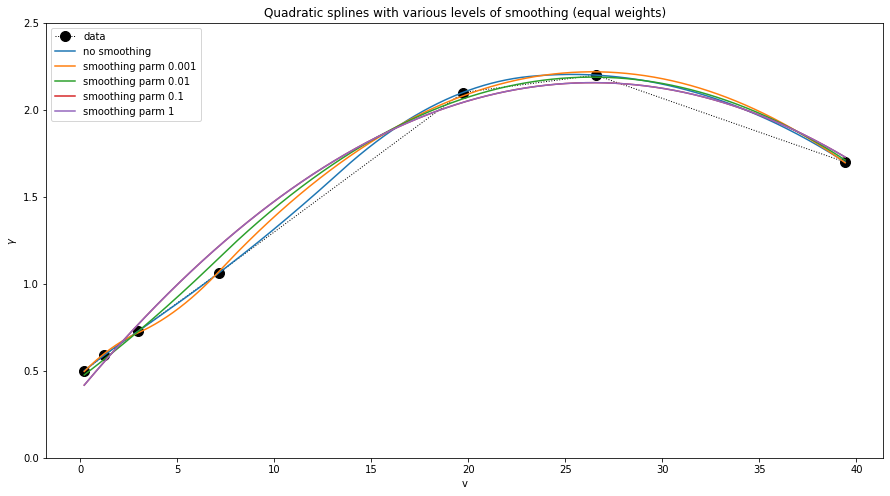

In [7]:
plot_data();
plt.title('Quadratic splines with various levels of smoothing (equal weights)')
p=2
defspl = interp.splrep(v, g, k=p)
ldefk = plt.plot(v_eval, interp.splev(v_eval, defspl), label='no smoothing');
print('Knots with no smoothing (s=0):\n{0}'.format(defspl[0]))
    
for s in [10**p for p in range(-3,1)]:
    smspl = interp.splrep(v, g, k=p, s=s)
    l = plt.plot(v_eval, interp.splev(v_eval, smspl), label='smoothing parm {0}'.format(str(s)));
    print('Knots for smoothing parameter s={0}:\n{1}'.format(s, smspl[0]))
    
plt.legend(loc='upper left');

Note that since the splines for both smoothing parameter `s=0.1` and `s=1` have no internal knots, both comprise a single polynomial and are equal.  This would also be the case for any higher value of `s`.  Below, one can see that smoothing affects knot selection, as locking the knot sequence results in identical results for all smoothing parameters.

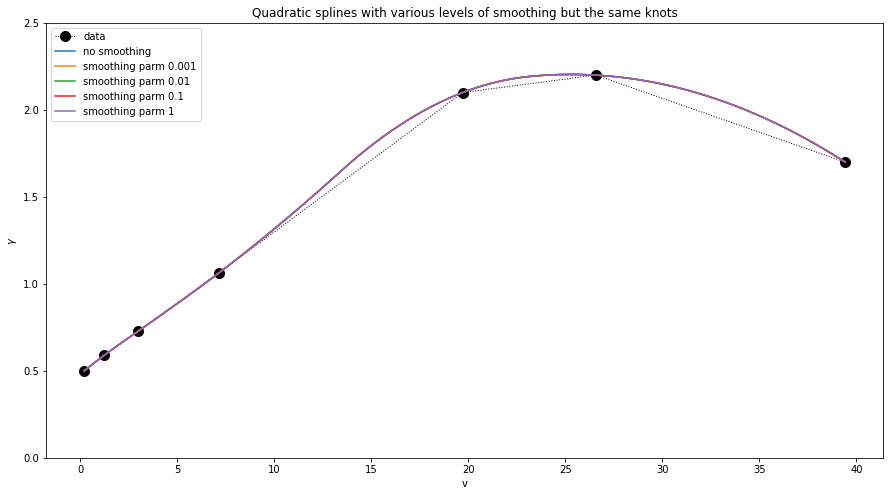

In [8]:
plot_data();
plt.title('Quadratic splines with various levels of smoothing but the same knots')
ldefk = plt.plot(v_eval, interp.splev(v_eval, defspl), label='no smoothing');

# get the internal knots used by the default spline
iknts = [defspl[0][i] for i in range(len(defspl[0])) if i==0 or defspl[0][i-1] != defspl[0][i]][1:-1]
  
for s in [10**p for p in range(-3,1)]:
    smspl = interp.splrep(v, g, t=iknts, k=p, s=s)
    l = plt.plot(v_eval, interp.splev(v_eval, smspl), label='smoothing parm {0}'.format(str(s)));
    # print('Coefficients for smoothing parm {0}:\{1}'.format(str(s), smspl[1]))
    
plt.legend(loc='upper left');

The fits seen so far have been pretty good, but as mentioned earlier, this is only a partial data set.  The actual data set includes several more points at low pressures extending asymptoticallly into the ideal gas range; these extend the domain of the curve to cover many degrees of magnitude.  The resulting fits become subject to wild swings that dwarf those seen earlier from the cubic spline with three internal knots. 

Below, plots switch to a logarithmic scale on the horizontal axis to accomodate the wide domain.  Knots for the two splines are shown by the vertical lines. Uncomment the final statement and rerun the following cell to see just how wildly the values vary.

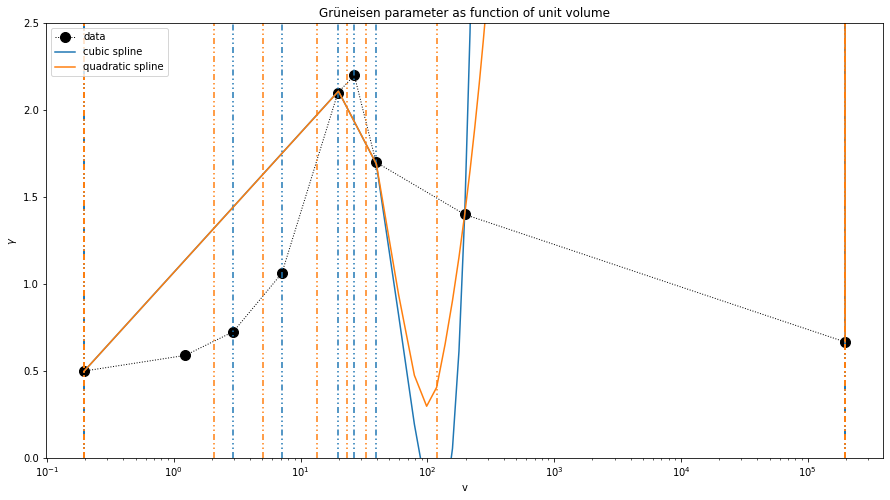

In [9]:
dat_lp = np.array([        
    (1.970940000000000E+02,   1.400000000000000E+00),
    (1.970940000000000E+05,   6.670000000000000E-01)#,
    #(1.970940000000000E+12,   6.670000000000000E-01)  #hiding this data point that repeats the ideal gas value
], dtype=np.float)

dat = np.concatenate((dat_hp, dat_lp))
v = dat[:,0]
g = dat[:,1]

def plot_logx_data():
    ax = plt.semilogx(v, g, 'ko:', linewidth=1, markersize=10, label='data')
    plt.xlabel('v')
    plt.ylabel('$\gamma$')
    plt.ylim((0, 2.5))
    return ax

ax = plot_logx_data();
plt.title('Gr\u00fcneisen parameter as function of unit volume')

v_eval = np.linspace(v[0],v[-1],10000)

# cubic B-spline fit 
spl3 = interp.splrep(v,g) # defaults to k=3
l3 = plt.semilogx(v_eval, interp.splev(v_eval, spl3), label='cubic spline')
plot_knot_locations(spl3[0], l3[0].get_color(), get_linestyle(3));
# quadratic B-spline fit
spl2 = interp.splrep(v,g,k=2)
l2 = plt.semilogx(v_eval, interp.splev(v_eval, spl2), label='quadratic spline')
plot_knot_locations(spl2[0], l2[0].get_color(), get_linestyle(2));

plt.legend(loc='upper left');
#plt.autoscale()


There are a couple of things one can try to improve this fit (such as it is), although with so little data on the right end of the data, chances of success with the high-level tools seems unlikely.  Since a lower-degree cuve is less prone to polynomial wiggle, efforts will focus on a quadratic B-spline.  Specifying a smoothing parameter may help.

Knots with no smoothing (s=0):
[1.97094000e-01 1.97094000e-01 1.97094000e-01 2.09306219e+00
 5.04006130e+00 1.34176622e+01 2.31360000e+01 3.29907500e+01
 1.18256450e+02 1.97094000e+05 1.97094000e+05 1.97094000e+05]
Knots for smoothing parameter s=0.1:
[1.97094000e-01 1.97094000e-01 1.97094000e-01 2.95419829e+00
 1.97094000e+01 2.65626000e+01 3.94189000e+01 1.97094000e+05
 1.97094000e+05 1.97094000e+05]
Knots for smoothing parameter s=0.5:
[1.97094e-01 1.97094e-01 1.97094e-01 1.97094e+01 1.97094e+05 1.97094e+05
 1.97094e+05]
Knots for smoothing parameter s=1:
[1.97094e-01 1.97094e-01 1.97094e-01 1.97094e+01 1.97094e+05 1.97094e+05
 1.97094e+05]
Knots for smoothing parameter s=5:
[1.97094e-01 1.97094e-01 1.97094e-01 1.97094e+05 1.97094e+05 1.97094e+05]
Knots for smoothing parameter s=10:
[1.97094e-01 1.97094e-01 1.97094e-01 1.97094e+05 1.97094e+05 1.97094e+05]


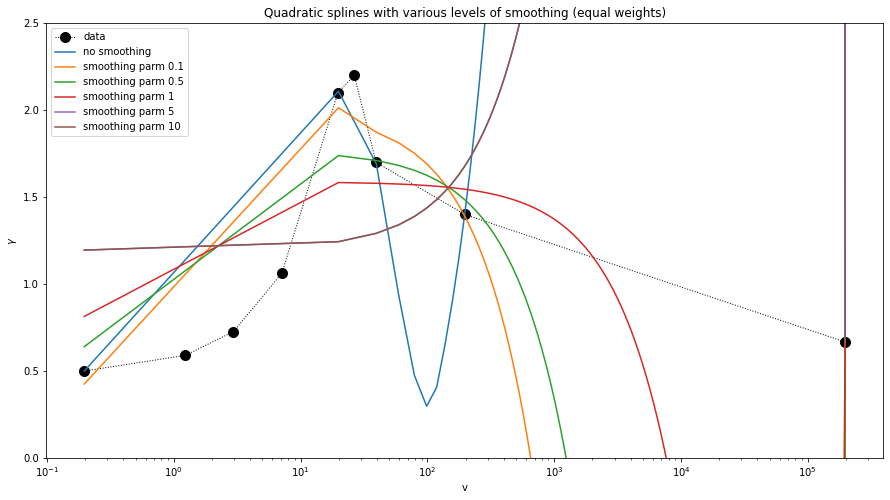

In [10]:
plot_logx_data();
plt.title('Quadratic splines with various levels of smoothing (equal weights)')
p=2
defspl = interp.splrep(v, g, k=p)
ldefk = plt.plot(v_eval, interp.splev(v_eval, defspl), label='no smoothing');
print('Knots with no smoothing (s=0):\n{0}'.format(defspl[0]))
    
for s in [.1, .5, 1, 5, 10]:
    smspl = interp.splrep(v, g, k=p, s=s)
    l = plt.plot(v_eval, interp.splev(v_eval, smspl), label='smoothing parm {0}'.format(str(s)));
    print('Knots for smoothing parameter s={0}:\n{1}'.format(s, smspl[0]))
    
plt.legend(loc='upper left');
#plt.autoscale()

Clearly this measure is insufficient.  Note that although the knots for the last few smoothing parameters are the same, the resulting curves are not, revealing that the smoothing parameter does not work by merely adjusting knot sequences.  Specifying a knot sequence that clamps the curve to the unit volume corresponding to the peak $\gamma$ may provide better results.  Before doing that, one should first have a better understanding of how knot multiplicity affects a B-spline.

## A dive into knot multiplicity

### End knot multiplicity
Knot multiplicity at the far boundaries of a B-spline's domain is often $p+1$, assuming that the first data point and first knot are both located at $u=u_0$ and the last are at $u=u_m$.  This ensures that the beginning and end of the resulting spline curve are respectively clamped to the first and last data points, as will be shown.  Consider a quadratic ($p=2$) B-spline on the domain $[a,d]$ with knots at $\{u_0, u_1,u_2,u_3,u_4,u_5,u_6,u_7\}=\{a, a, a, b, c, d, d, d\}$, where $a<b<c<d$.  Then non-zero basis functions are limited to

$$
\begin{align}
N_{0,2}(u) &> 0 \qquad on &[u_0, u_3) &= [a, b) \\
N_{1,2}(u) &> 0 \qquad on &[u_1, u_4) &= [a, c) \\
N_{2,2}(u) &> 0 \qquad on &[u_2, u_5) &= [a, d) \\
N_{3,2}(u) &> 0 \qquad on &[u_3, u_6) &= [b, d) \\
N_{4,2}(u) &> 0 \qquad on &[u_4, u_7) &= [c, d) 
\end{align}.
$$

In this case, there are only five basis functions since basis functions with higher values of $i$ would reference nonexistent knots (e.g., $N_{5,2}(u)$ would reference knot $u_8$).  This number of basis functions also honors the formula $m=n+p+1$, where $m+1$ is the number of knots (here, $m=7$) and $n+1$ is the number of coefficients, each of which is weighted by a basis function with the same index (coefficient $\alpha_i$ is weighted by basis function $N_{i,p}(u)$).[<sup>2</sup>](#fn2) The value of the spline at its endpoint (the last knot) is determined by the right-hand limit of non-zero basis functions that are open-ended on that value.

In knot span $[a,b)$, only the first three functions can be non-zero.  Diving into $N_{0,2}(u)$ (where $i=0$ and $p=2$), the first term uses $N_{0,1}(u)$.  This basis function can be non-zero only on knot span $[u_0, u_2)$, but this is the empty set $[a, a)$.  Thus this term disappears and only the second term matters.  $N_{1,1}(u)$ is non-zero on $[u_1, u_3) = [a,b)$, and comprises terms based on $N_{1,0}(u)$ and $N_{2,0}(u)$.  The former of these is non-zero only on $[u_1,u_2)=[a,a)$, which again is an empty span and can be ignored.  Thus the entire basis function $N_{0,2}(u)$ boils down to $N_{2,0}(u)$ and its coefficients:  

$$
\begin{align}
N_{0,2}(u) &= \frac{u-u_0}{u_2-u_0}N_{0,1}(u)+\frac{u-u_0}{u_{3}-u_{1}}N_{1,1}(u) = \frac{u-a}{b-a}N_{1,1}(u) \\
&= \frac{u-a}{b-a} \left[\frac{u-u_1}{u_2-u_1}N_{1,0}(u) + \frac{u_3-u}{u_3-u_2}N_{2,0}(u)\right] = \frac{u-a}{b-a}\left[\frac{b-u}{b-a}N_{2,0}(u)\right] \\
&= \frac{(u-a)(b-u)}{{(b-a)}^2} N_{2,0}(u) \\
&= \begin{cases}\frac{(u-a)(b-u)}{{(b-a)}^2} &u\in [u_2,u_3)=[a,b) \\
0 &otherwise\end{cases}.
\end{align}
$$

Similar analysis shows that

$$
\begin{align}
N_{1,2}(u) &= \frac{u-a}{b-a}N_{1,1}(u) + \frac{c-u}{c-a}N_{2,1}(u) \\
&= \frac{u-a}{b-a}\left[\frac{b-u}{b-a}N_{2,0}(u)\right] + \frac{c-u}{c-a}\left[\frac{u-a}{b-a}N_{2,0}(u) + \frac{c-u}{c-b}N_{3,0}(u) \right] \\
&= \begin{cases}\frac{(u-a)(b-u)}{{(b-a)}^2} + \frac{(c-u)(u-a)}{(c-a)(b-a)} &u\in[a,b) \\
\frac{{(c-u)}^2}{(c-a)(c-b)} &u\in[b,c) \\
0 &otherwise\end{cases}
\end{align}
$$

and that

$$
\begin{align}
N_{2,2}(u) &= \frac{u-a}{b-a}N_{2,1}(u) + \frac{d-u}{d-b} N_{3,1}(u)\\
&= \frac{u-a}{b-a}\left[\frac{u-a}{b-a}N_{2,0}(u) + \frac{c-u}{c-b}N_{3,0}(u) \right] + \frac{d-u}{d-b} \left[ \frac{u-b}{c-b}N_{3,0}(u) + \frac{d-u}{d-c}N_{4,0}(u)\right] \\
&= \begin{cases}{\left(\frac{u-a}{b-a}\right)}^2 &u\in[a,b) \\
\frac{(u-a)(c-u)}{(b-a)(c-b)} + \frac{(d-u)(u-b)}{(d-b)(c-b)} &u\in[b,c) \\
\frac{{(d-u)}^2}{(d-b)(d-c)} &u\in[c,d) \\
0 &otherwise\end{cases}.
\end{align}
$$

At the left boundary of the curve, $u=a$ and $\mathbf{C}(a) = \alpha_0 N_{0,2}(a) + \alpha_1 N_{1,2}(a) + \alpha_2 N_{2,2}(a)$ -- no other basis functions are non-zero on an interval that includes $a$.  Since $N_{0,2}(a)=1$, $N_{1,2}(a)=0$, and $N_{2,2}(a)=0$, at the lower boundary the curve is based solely on coefficient $\alpha_0$, which snaps to the $y$ value of the data point at $x=a$.  The same effect can be forced at internal knots as well using knot multiplicity.

### Internal knot multiplicity
Consider how this B-spline behaves at $u=b$ when the multiplicity of that knot is changed.  

#### Knot $b$ has multiplicity $k=1$
From the properties introduced earlier and given knot sequence $\{u_0, u_1,u_2,u_3,u_4,u_5,u_6,u_7\}=\{a, a, a, b, c, d, d, d\}$, only $N_{0,2}(u)$, $N_{1,2}(u)$, and $N_{2,2}(u)$ are non-zero on $[u_2,u_3)=[a,b)$ (the span to the left of $b$).  Here, the spline is 

$$
\begin{align}
\mathbf{C}(u \mid a\leq u<b) &= \alpha_0 N_{0,2}(u) + \alpha_1 N_{1,2}(u) + \alpha_2 N_{2,2}(u) \\
&= \left(\frac{u_3-u}{u_3-u_1}\frac{u_3-u}{u_3-u_2}\right) \alpha_0 + \left( \frac{u-u_1}{u_3-u_1}\frac{u_3-u}{u_3-u_2} + \frac{u_4-u}{u_4-u_2}\frac{u-u_2}{u_3-u_2}\right)\alpha_1 + \left(\frac{u-u_2}{u_4-u_2}\frac{u-u_2}{u_3-u_2} \right)\alpha_2 \\
&= \left(\frac{b-u}{b-a}\frac{b-u}{b-a}\right) \alpha_0 + \left( \frac{u-a}{b-a}\frac{b-u}{b-a} + \frac{c-u}{c-a}\frac{u-a}{b-a}\right)\alpha_1 + \left(\frac{u-a}{c-a}\frac{u-a}{b-a} \right)\alpha_2.
\end{align}
$$

The span to the right of $b$, i.e., $[u_3,u_4)=[b,c)$, has non-zero basis functions $N_{1,2}(u)$, $N_{2,2}(u)$, and $N_{3,2}(u)$.  Thus,

$$
\begin{align}
\mathbf{C}(u \mid b\leq u<c) &= \alpha_1 N_{1,2}(u) + \alpha_2 N_{2,2}(u) + \alpha_3 N_{3,2}(u) \\
&= \left(\frac{u_4-u}{u_4-u_2}\frac{u_4-u}{u_4-u_3}\right) \alpha_1 + \left( \frac{u-u_2}{u_4-u_2}\frac{u_4-u}{u_4-u_3} + \frac{u_5-u}{u_5-u_3}\frac{u-u_3}{u_4-u_3}\right)\alpha_2 + \left(\frac{u-u_3}{u_5-u_3}\frac{u-u_3}{u_4-u_3} \right)\alpha_3 \\
&= \left(\frac{c-u}{c-a}\frac{c-u}{c-b}\right) \alpha_1 + \left( \frac{u-a}{c-a}\frac{c-u}{c-b} + \frac{d-u}{d-b}\frac{u-b}{c-b}\right)\alpha_2 + \left(\frac{u-b}{d-b}\frac{u-b}{c-b} \right)\alpha_3.
\end{align}
$$

Compare the values of the spline to the left and right of $u=b$.  The right-hand limit of the spline over $[a,b)$ is

$$
\begin{align}
\mathbf{C}(u \mid a\leq u<b) \rvert_{u=b} &= \left(\frac{b-b}{b-a}\frac{b-b}{b-a}\right) \alpha_0 + \left( \frac{b-a}{b-a}\frac{b-b}{b-a} + \frac{c-b}{c-a}\frac{b-a}{b-a}\right)\alpha_1 + \left(\frac{b-a}{c-a}\frac{b-a}{b-a} \right)\alpha_2 \\
&= \frac{c-b}{c-a}\alpha_1 + \frac{b-a}{c-a}\alpha_2,
\end{align}
$$

while on the left end of $[b,c)$ the spline evaluates to 

$$
\begin{align}
\mathbf{C}(u \mid b\leq u<c)\rvert_{u=b} &= \left(\frac{c-b}{c-a}\frac{c-b}{c-b}\right) \alpha_1 + \left( \frac{b-a}{c-a}\frac{c-b}{c-b} + \frac{d-b}{d-b}\frac{b-b}{c-b}\right)\alpha_2 + \left(\frac{b-b}{d-b}\frac{b-b}{c-b} \right)\alpha_3 \\
&= \frac{c-b}{c-a} \alpha_1 + \frac{b-a}{c-a} \alpha_2.
\end{align}
$$

The values of the polynomials on either side of $b$ are equal at the boundary.  One can expect a quadratic B-spline to have $C^1$ connectivity at simple knot $b$.  The first derivative of this B-spline will have degree $1$, and over knot span $[a,b)$ only $N_{1,1}(u)$ and $N_{2,1}(u)$ can be nonzero.  Thus the first derivative is

$$
\begin{align}
\mathbf{C}'(u \mid a\leq u<b) &= N_{1,1}(u)\mathbf{Q}_0 + N_{2,1}(u)\mathbf{Q}_1 \\
&= \frac{u_3-u}{u_3-u_2}\left[\frac{p}{u_3-u_1}\left(\alpha_1-\alpha_0\right)\right] + \frac{u-u_2}{u_3-u_2}\left[\frac{p}{u_4-u_2}\left(\alpha_2-\alpha_1\right)\right] \\
&= -\frac{b-u}{b-a}\frac{2}{b-a}\alpha_0 + \left(\frac{b-u}{b-a}\frac{2}{b-a} - \frac{u-a}{b-a}\frac{2}{c-a}  \right)\alpha_1 + \frac{u-a}{b-a}\frac{2}{c-a}\alpha_2.
\end{align}
$$

At $u=b$, $\mathbf{C}'(u \mid a\leq u<b)\rvert_{u=b}= \frac{2}{c-a}\left(\alpha_2 - \alpha_1\right)$.  

Over knot span $[b,c)$ the only degree $1$ basis functions are $N_{2,1}(u)$ and $N_{3,1}(u)$, so the derivative on this knot span is

$$
\begin{align}
\mathbf{C}'(u \mid b\leq u<c) &= N_{2,1}(u)\mathbf{Q}_1 + N_{3,1}(u)\mathbf{Q}_2 \\
&= \frac{u_4-u}{u_4-u_3}\left[\frac{p}{u_4-u_2}\left(\alpha_2-\alpha_1\right)\right] + \frac{u-u_3}{u_4-u_3}\left[\frac{p}{u_5-u_3}\left(\alpha_3-\alpha_2\right) \right] \\
&= -\frac{c-u}{c-b}\frac{2}{c-a}\alpha_1 + \left[\frac{c-u}{c-b}\frac{2}{c-a} - \frac{u-b}{c-b}\frac{2}{d-b} \right]\alpha_2 + \frac{u-b}{c-b}\frac{2}{d-b}\alpha_3.
\end{align}
$$

At the left boundary of $[b,c)$, this evaluates to $ \mathbf{C}'(u \mid b\leq u<c)\rvert_{u=b} = \frac{2}{c-a}\left(\alpha_2-\alpha_1\right)$.  

Thus, as expected, the spline and its first derivative are equal at the knot ($u=b$), and the value of $\mathbf{C}(u)$ there is a weighted sum of $\alpha_1$ and $\alpha_2$.  Recall that these coefficients (control points) are responsible for shaping the curve and therefore are will have values that correspond closely to expected values of $y$ in local segments of the curve.  In the inverse problem, the Schoenberg-Whitney conditions are also critical in making sure the combination of data points and knots can adequately constrain the curve.  They state that for a $p$-degree spline with knots ${u_0, u_1, ..., u_m}$, the data points must honor the condition

$$
u_j < x_j < u_{j+p+1}, \qquad \text{for} \quad j=0, 1,...,n-p-2,
$$

with equality allowed only for the first and last knots.  Knots must be placed so the $j$th knot ($u_j$) comes before the $j$th data point,[<sup>3</sup>](#fn3) and that knot can appear at most $p+1$ times so that the $j+p+1$th knot comes after the $j$th data point.[<sup>4</sup>](#fn4) In this inverse problem, these conditions ensure that a B-spline curve of the specified degree as defined by data points $(x_i, y_i)$ uniquely identifies a set of coefficients $\alpha_i$ that would result in such a curve.  Be aware that the Schoenberg-Whitney conditions can be difficult to honor with a very small data set such as the sample $\gamma(v)$ data set in this notebook. In such cases, one must choose knots carefully, let the tools choose them automatically, or find ways to add additional constraints to the data (more on this last option later).

#### Knot $b$ has multiplicity $k=2$
One can affect the calculated coefficients by changing the knot sequence.  Strategies can involve removing knots, adding new knots between existing knots (e.g., a new knot $\beta$, where $b<\beta <c$), or increasing multiplicity of  existing knots.  For example, consider a region of the curve with high derivatives (steep slope or high curvature).  One might want to increase the density of knots in that region so that each coefficient affects a smaller portion of the overall curve.  Alternately, one might increase multiplicities of knots in that region so that fewer basis functions are non-zero there, indicating that fewer coefficients determine the shape of the curve in that part of the domain.  

The effect of the latter strategy can be demonstrated by increasing the multiplicity of knot $b$ so that the knot sequence for this example B-spline becomes $\{u_0,u_1,u_2,u_3,u_4,u_5,u_6,u_7,u_8\}=\{a, a, a, b, b, c, d, d, d\}$.  One could then expect the curve to be only $C^{p-k}=C^0$ continuous at $b$ (continuous value but discontinuous slope).  

On knot span $[a,b)$, the only relevant basis functions remain $N_{0,2}(u)$, $N_{1,2}(u)$, and $N_{2,2}(u)$.  The spline on this knot span is defined as

$$
\begin{align}
\mathbf{C}(u \mid a\leq u<b) &= \alpha_0 N_{0,2}(u) + \alpha_1 N_{1,2}(u) + \alpha_2 N_{2,2}(u) \\
&= \left(\frac{u_3-u}{u_3-u_1}\frac{u_3-u}{u_3-u_2}\right)\alpha_0 + \left(\frac{u-u_1}{u_3-u_1}\frac{u_3-u}{u_3-u_2} + \frac{u_4-u}{u_4-u_2}\frac{u-u_2}{u_3-u_2} \right)\alpha_1  + \left(\frac{u-u_2}{u_4-u_2}\frac{u-u_2}{u_3-u_2} + \frac{u_5-u}{u_5-u_3}\frac{u_5-u}{u_5-u_4}  \right)\alpha_2 \\
&= {\left(\frac{b-u}{b-a}\right)}^2\alpha_0 + \left(\frac{u-a}{b-a}\frac{b-u}{b-a} + \frac{b-u}{b-a}\frac{u-a}{b-a} \right)\alpha_1  + {\left(\frac{u-a}{b-a}\right)}^2\alpha_2.
\end{align}
$$

The right-hand limit of this expression is

$$
\begin{align}
\mathbf{C}(u \mid a\leq u<b)\rvert_{u=b} &= {\left(\frac{b-b}{b-a}\right)}^2\alpha_0 + \left(\frac{b-a}{b-a}\frac{b-b}{b-a} + \frac{b-b}{b-a}\frac{u-a}{b-a} \right)\alpha_1  + {\left(\frac{b-a}{b-a}\right)}^2\alpha_2 \\
&= \alpha_2.
\end{align}
$$

The first derivative on knot span $[a,b)$ is

$$
\begin{align}
\mathbf{C}'(u\mid a\leq u<b) &= N_{1,1}(u)\mathbf{Q}_0 + N_{2,1}(u)\mathbf{Q}_1 \\
&= \frac{u_3-u}{u_3-u_2}\left[\frac{p}{u_3-u_1}\left(\alpha_1-\alpha_0 \right) \right] + \frac{u-u_2}{u_3-u_2}\left[\frac{p}{u_4-u_2}\left(\alpha_2-\alpha_1  \right)  \right] \\
&= -\frac{b-u}{b-a}\frac{2}{b-a}\alpha_0 + \left[\frac{b-u}{b-a}\frac{2}{b-a} - \frac{u-a}{b-a}\frac{2}{b-a}\right]\alpha_1 + \frac{u-a}{b-a}\frac{2}{b-a}\alpha_2,
\end{align}
$$

which at the right end has limit $\mathbf{C}'(u\mid a\leq u<b) \rvert_{u=b} = \frac{2}{b-a}\left(\alpha_2 - \alpha_1\right)$.

Span $[b,c)$ with the new knot sequence is affected only by basis functions $N_{2,2}(u)$, $N_{3,2}(u)$, and $N_{4,2}(u)$.  The B-spline curve on $u \in [b,c)$ becomes

$$
\begin{align}
\mathbf{C}(u \mid b\leq u<c) &= \alpha_2 N_{2,2}(u) + \alpha_3 N_{3,2}(u) + \alpha_4 N_{4,2}(u) \\
&= \left(\frac{u_5-u}{u_5-u_3}\frac{u_5-u}{u_5-u_4}\right)\alpha_2 + \left( \frac{u-u_3}{u_5-u_3}\frac{u_5-u}{u_5-u_4} + \frac{u_6-u}{u_6-u_4}\frac{u-u_4}{u_5-u_4}\right)\alpha_3 + \left(\frac{u-u_4}{u_6-u_4}\frac{u-u_4}{u_5-u_4}\right)\alpha_4 \\
&= {\left(\frac{c-u}{c-b}\right)}^2\alpha_2 + \left( \frac{u-b}{c-b}\frac{c-u}{c-b} + \frac{d-u}{d-b}\frac{u-b}{c-b}\right)\alpha_3 + \left(\frac{u-b}{d-b}\frac{u-b}{c-b}\right)\alpha_4,
\end{align}
$$

which at $u=b$ evaluates to

$$
\begin{align}
\mathbf{C}(u \mid b\leq u<c)\rvert_{u=b} &= {\left(\frac{c-b}{c-b}\right)}^2\alpha_2 + \left( \frac{b-b}{c-b}\frac{c-b}{c-b} + \frac{d-b}{d-b}\frac{b-b}{c-b}\right)\alpha_3 + \left(\frac{b-b}{d-b}\frac{b-b}{c-b}\right)\alpha_4 \\
&= \alpha_2.
\end{align}
$$

The first derivative on this knot span is

$$
\begin{align}
\mathbf{C}'(u \mid b\leq u<c) &= N_{3,1}(u)\mathbf{Q}_2 + N_{4,1}(u)\mathbf{Q}_3 \\
&= \frac{u_5-u}{u_5-u_4}\left[\frac{p}{u_5-u_3}\left(\alpha_3-\alpha_2 \right)\right] + \frac{u-u_4}{u_5-u_4}\left[\frac{p}{u_6-u_4}\left(\alpha_4-\alpha_3 \right)\right] \\
&= -\frac{c-u}{c-b}\frac{2}{c-b}\alpha_2 + \left[\frac{c-u}{c-b}\frac{2}{c-b} -  \frac{u-b}{c-b}\frac{2}{d-b} \right]\alpha_3 + \frac{u-b}{c-b}\frac{2}{d-b}\alpha_4,
\end{align}
$$

which at the knot $b$ evaluates to $\mathbf{C}'(u \mid b\leq u<c) \rvert_{u=b} =\frac{2}{c-b}\left(\alpha_3 - \alpha_2\right)$.  

When $b$ has multiplicity $k=2$, expressions to the left and right of the boundary both snap to $\alpha_2$, so no other coefficients affect the value at that site. However, the first derivative is no longer continuous at the boundary: to the left of $b$, the slope is based on coefficients $\alpha_1$ and $\alpha_2$, but to the right it is based on $\alpha_2$ and $\alpha_3$.  This is consistent with expectations: $C^{p-k} = C^{2-2} = C^0$ predicts continuity of value but not of slope at such a knot.


#### Knot $b$ has multiplicity $k=3$
Further increasing the multiplicity for $b$ breaks continuity of value, although there may be some cases where that is desirable (e.g. a phase change could result in a discontinuity of some physical property).  To continue the previous example, consider the effect of knot sequence $\{u_0,u_1,u_2,u_3,u_4,u_5,u_6,u_7,u_8,u_9\}=\{a, a, a, b, b, b, c,d, d, d\}$, where knot $b$ now has multiplicity $k=3$.  Here the curve and its first derivative on $[a,b)$ are both the same as for the multiplicity $k=2$ case, since the knots are identical through $u_4$, which is the highest index used in the formula:

$$
\begin{align}
\mathbf{C}(u \mid a\leq u<b) &= {\left(\frac{b-u}{b-a}\right)}^2\alpha_0 + \left(\frac{u-a}{b-a}\frac{b-u}{b-a} + \frac{b-u}{b-a}\frac{u-a}{b-a} \right)\alpha_1  + {\left(\frac{u-a}{b-a}\right)}^2\alpha_2 \\
\mathbf{C}'(u\mid a\leq u<b) &= -\frac{b-u}{b-a}\frac{2}{b-a}\alpha_0 + \left[\frac{b-u}{b-a}\frac{2}{b-a} - \frac{u-a}{b-a}\frac{2}{b-a}\right]\alpha_1 + \frac{u-a}{b-a}\frac{2}{b-a}\alpha_2.
\end{align}
$$

The respective limits at the right end of knot span $[a,b)$ are $\mathbf{C}(u \mid a\leq u<b) \rvert_{u=b} = \alpha_2$ and $\mathbf{C}'(u\mid a\leq u<b) \rvert_{u=b} = \frac{2}{b-a}\left(\alpha_2 - \alpha_1\right)$.

For knot span $[b,c)$, the B-spline curve becomes

$$
\begin{align}
\mathbf{C}(u \mid b\leq u<c) &= \alpha_3 N_{3,2}(u) + \alpha_4 N_{4,2}(u) + \alpha_5 N_{5,2}(u) \\
&= \frac{u_6-u}{u_6-u_4}\frac{u_6-u}{u_6-u_5}\alpha_3 + \left[ \frac{u-u_4}{u_6-u_4}\frac{u_6-u}{u_6-u_5} + \frac{u_7-u}{u_7-u_5}\frac{u-u_5}{u_6-u_5} \right]\alpha_4 + \frac{u-u_5}{u_7-u_5}\frac{u-u_5}{u_6-u_5}\alpha_5 \\
&= \frac{c-u}{c-b}\frac{c-u}{c-b}\alpha_3 + \left[ \frac{u-b}{c-b}\frac{c-u}{c-b} + \frac{d-u}{d-b}\frac{u-b}{c-b} \right]\alpha_4 + \frac{u-b}{d-b}\frac{u-b}{c-b}\alpha_5,
\end{align}
$$

which at $u=b$ evaluates to $\mathbf{C}(u \mid b\leq u<c) \rvert_{u=b} = \alpha_3$.  Thus with multiplicity $k=3$, the spline is discontinuous at knot $b$, as the left- and right-hand limits are based on different coefficients.

---
<span id="fn2">2. Stating that coefficients weighted by basis functions rather than the other way around may seem counterintuitive, but recalling the original geometric motivation (coefficients represent control points) and the property that the basis functions add up to $1$ over any knot span $[u_i, u_{i+1})$ can help resolve the confusion.</span><br/>
<span id="fn3">3. Or is equal to it for the first data point and knot</span><br/>
<span id="fn4">4. Or is collated with it for the last data point and knot</span>

---

Returning to the problem of fitting the $\gamma(v)$ data set, one can try to design a custom knot sequence that will create a more reasonable fit.  A few examples are shown below.  However, many high-level B-spline tools make assumptions that prevent one from using B-splines to their full potential.  For example, the default SciPy functions and objects often assume a clamped knot sequence.  This typically isn't a problem.  However, these functions also prevent the use of multiple knots internally (as is the case with the function used in the code below).  This means that one cannot easily force a spline to pass through data points in the middle of the resulting curve, although a similar effect can be achieved by using a series of knots that vary only at some high level of precision (e.g., varying by $10^{-5}$ in the example below).

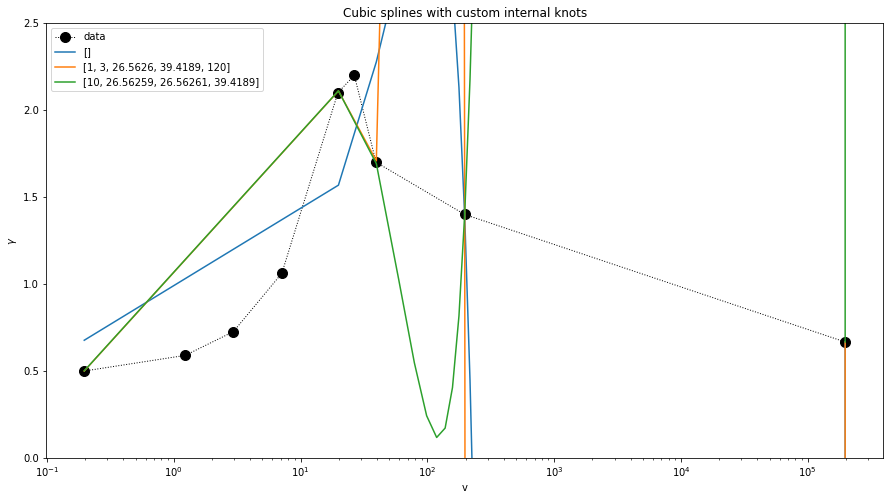

In [19]:
plot_logx_data();
plt.title('Cubic splines with custom internal knots')

format_knot = lambda knt: '{:.3}'.format(knt)

p=3
defspl = interp.splrep(v,g,k=p,s=1)
iknts = defspl[0]
plt.plot(v_eval, interp.splev(v_eval, defspl), label='['+', '.join(map(format_knot,iknts[p+1:-p-1]))+']')

iknts = [1, 3, 26.5626, 39.4189, 120]
smspl = interp.splrep(v, g, k=p, s=1, t=iknts)
plt.plot(v_eval, interp.splev(v_eval, smspl), label=iknts);

iknts = [10, 26.56259, 26.56261, 39.4189]
smspl = interp.splrep(v, g, k=p, s=1, t=iknts)
plt.plot(v_eval, interp.splev(v_eval, smspl), label=iknts);

plt.legend(loc='upper left');
#plt.autoscale()

With this particular data set, there are few $(x,y)$ data points to constrain the curve through most of the domain, so the resulting curve varies wildly in those regions.  However, there is behavior that could further constrain the data set.  First, the data set is constant or asymptotic  at the beginning and end of the domain so the first derivatives at the beginning and end of the domain should be $0$ or close to it.  The first derivative should also be $0$ at the peak of the curve.  In addition, the second derivative should be $0$ at any inflection points, and should remain fairly close to $0$ in the wide gaps between the last few data points.  Recall that the curve's derivatives are well-defined and use the same coefficients as the curve itself, so one could add those conditions to the matrix $\mathbf{A}$ to further constrain the inverse problem.  

### Regularization: adding derivative-based constraints
Consider adding rows to collocation matrix $\mathbf{A}$ to indicate that a B-spline curve's first derivative is $0$ at a site corresponding to its peak. Returning to the earlier example used to examine the effects of knot multiplicity, a B-spline with degree $p=2$ and knot sequence $\{u_0, u_1,u_2,u_3,u_4,u_5,u_6,u_7\}=\{a, a, a, b, c, d, d, d\}$ will have $n=m-p-1=7-2-1=4$.  Since this is a clamped knot sequence, the first derivative of the curve is 

$$
\begin{align}
\mathbf{C}'(u) &= \sum_{i=0}^{n-1}N_{i+1,p-1}(u)\mathbf{Q}_i = \sum_{i=0}^{3}N_{i+1,1}(u)\left[\frac{2}{u_{i+3}-u_{i+1}}\left(\alpha_{i+1}-\alpha_i\right)\right] \\
&= N_{1,1}(u)\left[\frac{2}{u_3-u_1}\left(\alpha_1-\alpha_0\right)\right] + N_{2,1}(u)\left[\frac{2}{u_4-u_2}\left(\alpha_2-\alpha_1\right)\right] + N_{3,1}(u)\left[\frac{2}{u_5-u_3}\left(\alpha_3-\alpha_2\right)\right] + N_{4,1}(u)\left[\frac{2}{u_6-u_4}\left(\alpha_4-\alpha_3\right)\right] \\
&= \left[-\frac{2}{b-a}N_{1,1}(u)\right]\alpha_0 + \left[\frac{2}{b-a}N_{1,1}(u) - \frac{2}{c-a}N_{2,1}(u) \right]\alpha_1 + \left[\frac{2}{c-a}N_{2,1}(u) - \frac{2}{d-b}N_{3,1}(u)\right]\alpha_2 + \left[\frac{2}{d-b}N_{3,1}(u) - \frac{2}{d-c}N_{4,1}(u) \right]\alpha_3 + \left[\frac{2}{d-c}N_{4,1}(u) \right]\alpha_4.
\end{align}
$$

As expected, the degree of the quadratic B-spline curve's derivative is $p=1$.  Suppose the peak of the curve lies at $\beta \in [b,c)$.  Since the point lies in knot span $[u_3,u_4)$, the only nonzero degree $p=1$ basis functions will be $N_{2,1}(u)$ and $N_{3,1}$.  The first derivative for $\beta$ becomes

$$
\mathbf{C}'(u=\beta) = -\frac{2}{c-a}N_{2,1}(\beta)\alpha_1 + \left[\frac{2}{c-a}N_{2,1}(\beta) - \frac{2}{d-b}N_{3,1}(\beta)\right]\alpha_2 + \frac{2}{d-b}N_{3,1}(\beta)\alpha_3.
$$

The collocation matrix $\mathbf{A}$ for this problem has five columns, each corresponding to one of the five coefficients that control the shape of the B-spline curve.  To indicate that the first derivative is $0$ at site $u=\beta$ (at the peak of the curve), one would add the following row to the collocation matrix 

$$
\begin{array}{c|c|c|c|c}
0 & -\frac{2}{c-a}N_{2,1}(\beta) & \frac{2}{c-a}N_{2,1}(\beta) - \frac{2}{d-b}N_{3,1}(\beta) & \frac{2}{d-b}N_{3,1}(\beta) & 0
\end{array}
$$

and a corresponding entry $0$ in the $\mathbf{d}$ vector.  

Sadly, the high-level B-spline tools do not allow one to specify such regularization when fitting a curve to a data set.  Instead, to determine whether this strategy can sufficiently constrain the $\gamma (v)$ curve, one must find or write functionality that directly calculates the basis functions and solve the linear algebra problem directly.

## B-splines for vector-valued $\mathbf{x}$
The discussion so far has focused on B-spline curves dependent on a scalar $x$.  However, it is possible to construct and evaluate B-spline curves based on a vector $x$ (multiple independent variables).  Incidentally, it is also possible to construct a B-spline for multidimensional $y$ values (curve for scalar $y$, surface for 2D $y$, volume for 3D $y$), but those will not be treated here.

... more on this topic later

# References
* [Dr. CK Shene, Introduction to Computing with Geometry](https://pages.mtu.edu/~shene/COURSES/cs3621/NOTES/) (see Unit 6)
* [J Michael Brown,  Local Basis Function Representation of Thermodynamic Surfaces](https://earthweb.ess.washington.edu/brown/page/index.html)
* [Wikipedia for derivative expressions of a B-spline curve](https://en.wikipedia.org/wiki/B-spline#Derivative_expressions)